In [1]:
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Fire Emblem Heroes** es un videojuego para dispositivos Android y iOS, centrado en la serie de juegos de Nintendo, Fire Emblem, combinando los personajes y mundos de más de 14 títulos.

Los personajes en cuestión, o "unidades" tienen atributos que los diferencian entre sí, tales como **puntos de vida**, **ataque**, **velocidad**, **defensa**, y **resistencia**. Además de estos atributos, tienen su **tipo de arma**, **tipo de movimiento**, y **color**.

In [41]:
df = pd.read_csv('FEH Unit List.csv')

Hacemos un *sample* de nuestro dataset:

In [4]:
df.sample(n=5)

,ID,Unit Name,Character,Backpack,Unit Obtained,Special Type,Theme,Rarity,Release Date,Refine Date,...,Tier.1,C,Tier.2,X,HP,ATK,SPD,DEF,RES,BST
166,167,Brave Roy,Roy,NaN,Normal Pool,NaN,CYL,4★ Special,2017-08-31,2019-09-04,...,3.0,NaN,NaN,NaN,38,32,34,26,24,154
518,519,Fallen Ashnard,Ashnard,NaN,Grand Hero Battle,NaN,Fallen,Grail,2020-05-09,2024-02-06,...,NaN,Even Atk Wave,3.0,NaN,43,37,21,35,31,167
25,26,Michalis,Michalis,NaN,Grand Hero Battle,NaN,NaN,Grail,2017-03-20,2017-11-28,...,NaN,Threaten Def,3.0,NaN,43,34,26,35,19,157
181,182,Arvis,Arvis,NaN,Grand Hero Battle,NaN,NaN,Grail,2017-10-18,2020-10-07,...,NaN,Def Ploy,3.0,NaN,33,34,31,17,33,148
905,906,Chloé,Chloé,NaN,Normal Pool,NaN,NaN,5★,2023-01-17,NaN,...,4.0,NaN,NaN,NaN,36,38,40,28,42,184


Nuestro dataset cuenta con 35 columnas, muchas de las cuales me parecen redundantes o no son útiles para el análisis que quisiera hacer. Así que limpiaremos un poco el dataset haciendo *drop* a estas columnas, y cambiando el nombre de otras para mayor legibilidad:

In [42]:
df = df.drop(columns=['ID', 'Character', 'Backpack','Unit Obtained','Special Type','Theme','Rarity',
                      'Refine Date','Title of Origin', 'Secondary Title','Generation','Duel Effect',
                      'Resplendant?', 'Color', 'Blessing','Weapon', 'Assist','Special','A','Tier','B','Tier.1','C','Tier.2','X'])

También añadiremos una columna adicional a nuestro dataset, donde guardaremos el año de la columna **Release Date**.

In [43]:
df = df.rename(columns={'Unit Name':'Nombre','Release Date':'Fecha', 'Weapon Type':'Arma',
                        'Movement Type':'Movimiento'})
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.strftime('%Y')
df = df.drop(columns=['Fecha'])

df.sample(n=5)

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
954,Legendary Hinoka,Bow,Flying,40,46,46,23,22,177,2023
1039,Legendary Camilla,Tome,Flying,40,45,46,22,25,178,2023
629,Erinys,Lance,Flying,39,37,41,32,23,172,2021
690,Pirate Naesala,Beast,Flying,42,39,43,23,25,172,2021
854,Holst,Sword,Infantry,42,43,41,35,26,187,2022


Ahora que hemos limpiado un poco el dataset, podemos ver algunos datos:

---

Primero quisiera ver los valores más altos y bajos para algunas estadísticas de los personajes que me parecen interesantes:

Primero, los puntos de vida o **HP** (Health Points). En el juego, indican que tanta "vitalidad" tiene el personaje, y al caer a 0 son derrotados. Entre los más altos esperamos ver personajes de tipo de movimiento armadura, **Armor**, ya que regularmente son los más durables.

In [46]:
df.nlargest(3, 'HP')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
180,Arden,Sword,Armor,60,36,16,41,16,169,2017
34,Zephiel,Sword,Armor,55,35,16,38,24,168,2017
46,Hector,Axe,Armor,52,36,24,37,19,168,2017


Entre los más bajos, esperamos ver unidades con tipo de arma **Staff**, y **Tome**. Los personajes con tipo de arma **Staff**, o bastón, se utilizan para curar a otros personajes, y regularmente son unidades débiles. Los personajes con tipo de arma **Tome**, utilizan tomos mágicos, atacando los puntos débiles de la mayoría de las unidades. Esto los hace fuertes pero frágiles.

In [47]:
df.nsmallest(3, 'HP')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
93,Elise,Staff,Cavalry,30,32,32,19,32,145,2017
81,Kagero,Dagger,Infantry,31,35,32,22,28,148,2017
130,Genny,Staff,Infantry,32,35,25,21,34,147,2017


La próxima estadística es ataque, representado en la columna **ATK**. El ataque indica la "fuerza" de un personaje. Mientras más ataque tenga, hará más daño.
Mi predicción es que habrá más unidades de tipo de movimiento **Armor**.

In [48]:
df.nlargest(3, 'ATK')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
1058,Valentine's Ephraim,Lance,Armor,47,48,17,48,41,201,2024
931,Vigarde,Lance,Armor,46,47,30,44,29,196,2023
962,Summer Ephraim,Axe,Cavalry,41,47,16,44,31,179,2023


La siguiente estadística es la velocidad del personaje, o **SPD** (speed). La velocidad del personaje indica si logra hacer ataques adicionales.

En los puntos más bajos de velocidad, espero que habrá una vez más, personajes de movimiento tipo **Armor**. Esto por que sus puntos se enfocan más en defensa y ataque.

In [50]:
df.nsmallest(3, 'SPD')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
572,Halloween Dheginsea,Dragonstone,Armor,45,45,14,41,39,184,2020
657,Fallen Edelgard,Beast,Armor,45,42,14,44,39,184,2021
909,Mythic Gotoh,Tome,Infantry,40,42,14,38,42,176,2023


Ahora, los puntos de defensa (**DEF**). Esta indica que tanto daño toma el personaje contra ataques físicos (armas tipo espada, lanza, hacha, arco, daga o bestia).

Una vez más esperamos ver unidades de movimiento tipo **Armor** para las cantidades mayores.

In [51]:
df.nlargest(3,'DEF')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
927,Gilliam,Lance,Armor,47,44,21,48,35,195,2023
1007,Halloween Kellam,Sword,Armor,48,46,31,48,27,200,2023
1058,Valentine's Ephraim,Lance,Armor,47,48,17,48,41,201,2024


Entre las defensas más bajas, esperamos ver unidades de arma tipo **Staff** y **Tome**.

In [52]:
df.nsmallest(3, 'DEF')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
111,Lucius,Staff,Infantry,37,32,30,13,35,147,2017
150,Delthea,Tome,Infantry,33,36,34,13,31,147,2017
10,Linde,Tome,Infantry,35,35,36,14,27,147,2017


La última estadística es resistencia, **RES**. Esta indica cuanto daño tomará la unidad de ataques mágicos (tomos, bastones, o dragones).

Entre las resistencias más altas espero ver unidades mágicas (los anteriormente mencionados **Staff** y **Tome**).

In [53]:
df.nlargest(3, 'RES')

,Nombre,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST,Año
937,Young Lucius,Staff,Infantry,38,45,31,17,47,178,2023
986,Brave Soren,Tome,Infantry,40,45,34,16,47,182,2023
1015,Ninja Sanaki,Tome,Cavalry,40,47,24,16,47,174,2023


Un patrón interesante que se puede observar es que las unidades con valores más altos en sus estadísticas, a excepción de los puntos de vida, suelen ser unidades agregadas más recientemente al juego, y las que tienen puntos más bajos son las unidades agregadas en los inicios del juego, en el año 2017. Esto tiene sentido, ya que para seguir haciendo "interesante" el juego, tienen que añadir cada vez unidades más fuertes.

Ahora utilizaremos la columna **BST** (Base Stat Total) de nuestro dataset. Esta indica la sumatoria de todas las estadísticas anteriormente mencionadas para cada unidad. Por ejemplo:

In [17]:
df.head(1)

,Nombre,Personaje,Fecha,Origen,Color,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST
0,Alfonse,Alfonse,2017-02-02,Heroes,Red,Sword,Infantry,43,35,25,32,22,157


El personaje **Alfonse**, una de las primeras unidades añadidas al juego, cuenta con **43** puntos en **HP**, **35** de **ATK**, **25** de **SPD**, **32** de **DEF**, y **22** de **RES**. Su total de estadísticas, o **BST**, es de **157**.

In [18]:
43 + 35 + 25 + 32 + 22

157

Veamos ahora la unidad más reciente añadida al dataset:

In [19]:
df.tail(1)

,Nombre,Personaje,Fecha,Origen,Color,Arma,Movimiento,HP,ATK,SPD,DEF,RES,BST
1105,Jarod,Jarod,2024-06-07,Radiant Dawn,Blue,Lance,Infantry,42,46,44,34,27,193


El personaje **Jarod**, añadido el 7 de junio de 2024 al juego, tiene un **BST** de **193**.

Haremos un *lineplot* para representar como el promedio de **BST** ha ido incrementando conforme a los años:

<Axes: xlabel='Año', ylabel='BST'>

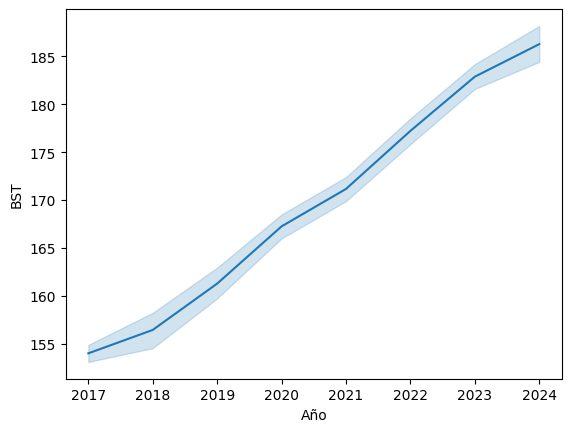

In [57]:
df['Año'] = pd.to_numeric(df['Año'])
dfbst = df.loc[:,['Año','BST']]
sns.lineplot(x='Año', y='BST', data=dfbst)

Esto se puede observar en las diferentes estadísticas de los personajes. Por ejemplo, utilizamos un *boxplot* para ver que la estadística **ATK** ha ido incrementando en promedio, con algunos outliers y observando que se ha mantenido en los años 2023 y 2024.

<Axes: xlabel='Año', ylabel='ATK'>

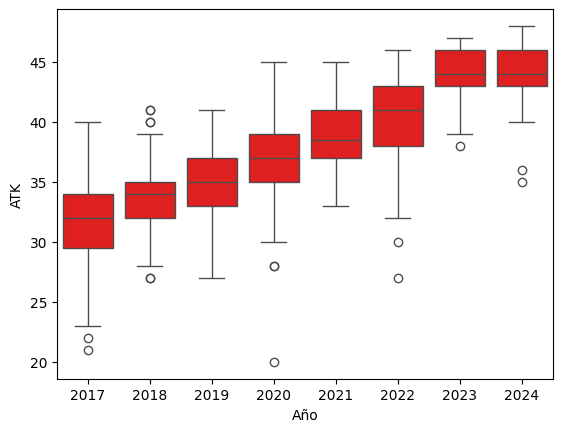

In [60]:
sns.boxplot(x='Año', y='ATK', data=df, color='red')

Podemos hacer un análisis similar para la estadística de **SPD**, aunque en menor medida y mucho más variado, al ser una estadística que varia mucho de personaje a personaje (no es útil para todas las unidades de la manera que **ATK** lo es).

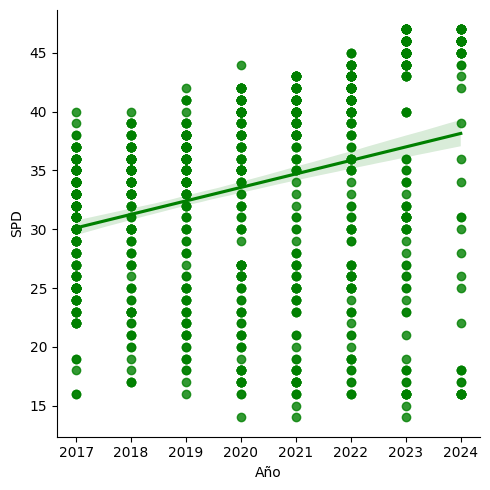

In [67]:
sns.lmplot(x='Año', y='SPD', data=df, line_kws={'color':'green'}, scatter_kws={'color':'green'})

Y al analizar la estadística **DEF** utilizando un *violinplot*, podemos ver que aunque el promedio se ha mantenido relativamente estable, los valores más altos han ido subiendo.

<Axes: xlabel='Año', ylabel='DEF'>

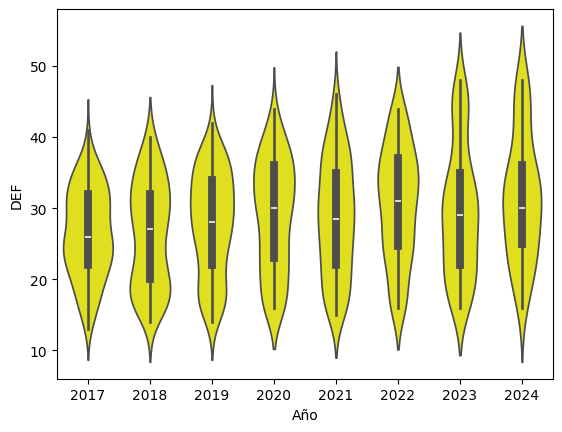

In [70]:
sns.violinplot(x='Año', y='DEF', data=df, color='yellow')

La estadística **RES**, sin embargo, al igual que las otras ha tenido un aumento en su promedio con el paso de los años.

<Axes: xlabel='Año', ylabel='RES'>

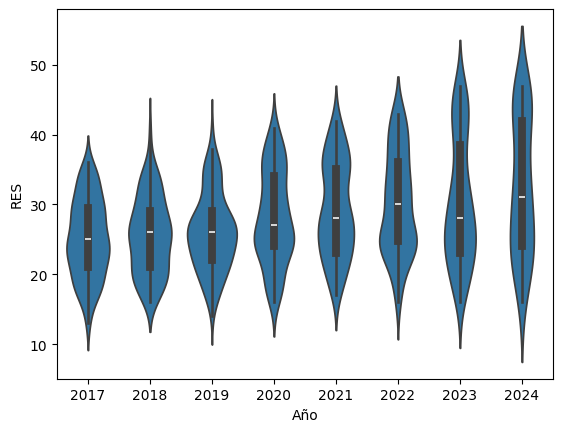

In [71]:
sns.violinplot(x='Año', y='RES', data=df)

Para finalizar haremos una tabla viendo número de unidades añadidas por año (2024 aún está incompleto ya que es el año en curso):

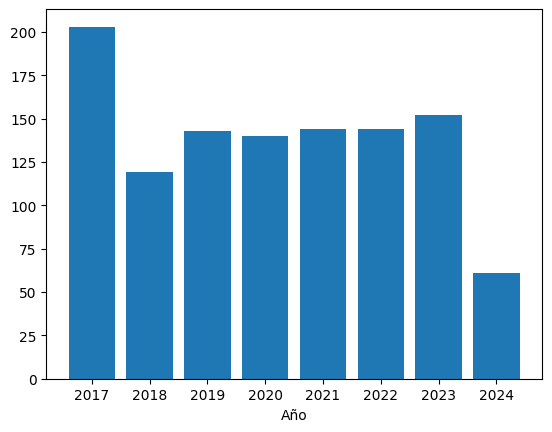

In [85]:
conteoAño = df['Año'].value_counts().sort_index()

plt.bar(conteoAño.index, conteoAño.values)
plt.xlabel("Año")
plt.show()


Y por último una gráfica de pastel indicando la distribución de unidades por tipo de movimiento:

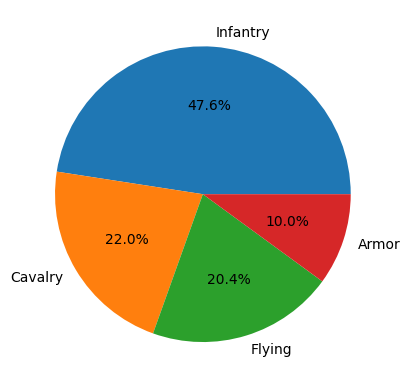

In [81]:
conteoMov = df['Movimiento'].value_counts()

plt.pie(conteoMov, labels=conteoMov.index, autopct='%1.1f%%')
plt.show()
